This notebook visualises the data obtained by running simulations. Simulations can be run using simulate.py and following the README porovided.

In [97]:
import json
import matplotlib.pyplot as plt
import numpy as np

Plots the confirmation bias model we used for individual agents.

In [101]:
def plot_model(b, ax):
	x = 2-b
	y = 1 - x/2

	ax.plot((0, x), (1, y), color='blue')
	ax.plot((x, 2), (y, 0), linestyle='dashed', color='blue')

	if b:
		ax.plot((x, 2), (y, 1), color='red')

		ax.plot((x, 2), (0, 0), color='green')
		ax.plot((x, x), (-0.05, 0.05), color='green')
		ax.plot((2, 2), (-0.05, 0.05), color='green')
		ax.text((2+x)/2, -0.075, 'B', color='green', fontsize=10)

	ax.set_title(f'Confirmation Bias Model (B = {b})', fontsize=12)

Text(0.08, 0.5, 'Probability of strengthening opinion, P(S)')

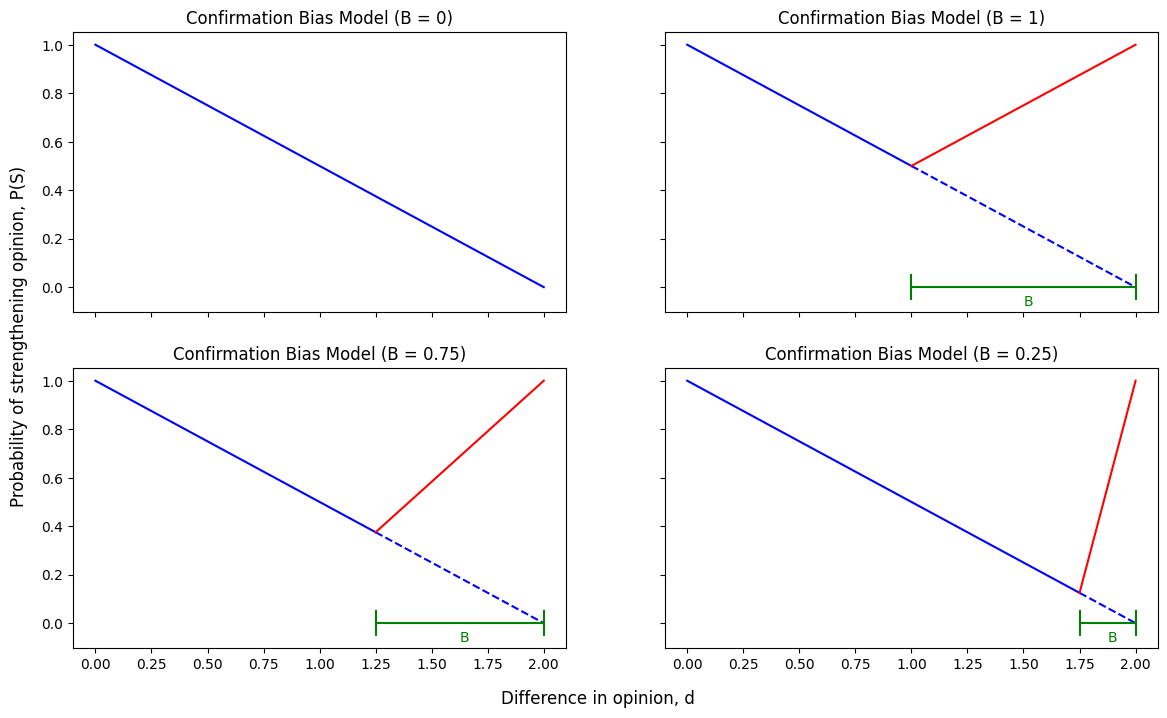

In [102]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True)

plot_model(0, axs[0, 0])
plot_model(1, axs[0, 1])
plot_model(0.75, axs[1, 0])
plot_model(0.25, axs[1, 1])

fig.text(0.5, 0.04, 'Difference in opinion, d', ha='center', fontsize=12)
fig.text(0.08, 0.5, 'Probability of strengthening opinion, P(S)', va='center', rotation='vertical', fontsize=12)

Graph bias vs polarisation

In [26]:
data = []

file = 'data/bias-vs-polarisation/data-p{}-c{}-plat0-rec0.json'

for p, c in ((0.25, 0.1), (0.5, 0.1), (0.75, 0.1), (0.5, 0.3), (0.5, 0.5)):
	with open(file.format(p, c), 'r') as f:
		data.append(json.load(f)['data'])

In [88]:
def plot_avg(data, label):
	bs, ps = zip(*list(data.items()))
	bs = [float(b) for b in bs]

	avg_ps = []
	for p in ps:
		avg_ps.append(sum(p) / len(p))
	
	plt.plot(bs, avg_ps, label=label)

Text(0, 0.5, 'Average polarisation')

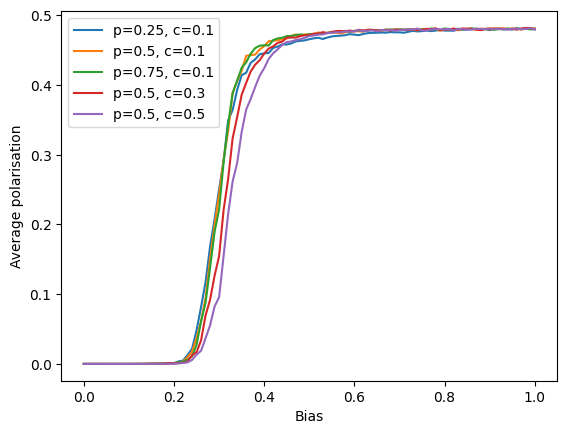

In [89]:
plot_avg(data[0], 'p=0.25, c=0.1')
plot_avg(data[1], 'p=0.5, c=0.1')
plot_avg(data[2], 'p=0.75, c=0.1')
plot_avg(data[3], 'p=0.5, c=0.3')
plot_avg(data[4], 'p=0.5, c=0.5')

plt.legend()
plt.xlabel('Bias')
plt.ylabel('Average polarisation')

In [90]:
def variance(lst):
	avg = sum(lst) / len(lst)
	return sum([(x - avg)**2 for x in lst]) / len(lst)

def plot_var(data, label):
	bs, ps = zip(*list(data.items()))
	bs = [float(b) for b in bs]

	avg_ps = []
	for p in ps:
		avg_ps.append(variance(p))
	
	plt.plot(bs, avg_ps, label=label)

Text(0, 0.5, 'Polarisation variance')

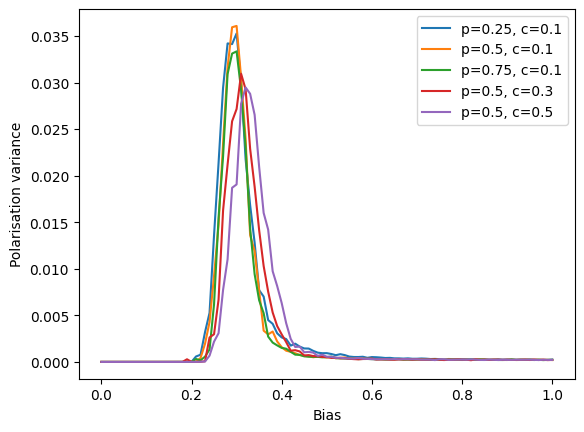

In [91]:
plot_var(data[0], 'p=0.25, c=0.1')
plot_var(data[1], 'p=0.5, c=0.1')
plot_var(data[2], 'p=0.75, c=0.1')
plot_var(data[3], 'p=0.5, c=0.3')
plot_var(data[4], 'p=0.5, c=0.5')

plt.legend()
plt.xlabel('Bias')
plt.ylabel('Polarisation variance')

Here we find the peaks of the polarisation variance graph to estimate the critical bias value B.

In [68]:
peaks = []

for d in data:
	vars = {}
	for b, ps in d.items():
		vars[b] = variance(ps)
	
	peaks.append(max(d.keys(), key=lambda b: vars[b]))

peaks


['0.3', '0.3', '0.3', '0.31', '0.32']

Graph fraction of agents conforming to platform's opinion against level of platform bias

In [92]:

file = 'data/{}-vs-polarisation/data-b{}-p0.5-c0.1-{}1.json'

platform_data = []
rec_data = []

for b in [0, 0.25, 0.5, 0.75]:
	with open(file.format('platform', b, 'rec'), 'r') as f:
		platform_data.append(json.load(f)['data'])

	with open(file.format('rec', b, 'platform'), 'r') as f:
		rec_data.append(json.load(f)['data'])

In [93]:
def get_data(data):
	xs = []
	ys = []
	for key, val in data.items():
		xs.append(float(key))
		y = []
		for v in val:
			y.append(float(v[1] if v[0] == 1 else v[2]))
		ys.append(sum(y) / len(y))
	return xs, ys

In [94]:
def plot_conform(data, xlabel):
	xs = []
	ys = []

	for d in data:
		x, y = get_data(d)
		xs.append(x)
		ys.append(y)

	for i, b in enumerate([0, 0.25, 0.5, 0.75]):
		plt.plot(xs[i], ys[i], label=f'b={b}')

	plt.legend()
	plt.xlabel(xlabel)
	plt.ylabel('Average fraction conforming to platform')

In [81]:
def get_data_avg(data):
	xs = []
	ys = []
	for key, val in data.items():
		xs.append(float(key))
		y = []
		for v in val:
			y.append(min(v[1:]))
		ys.append(sum(y) / len(y))
	return xs, ys

In [82]:
def plot_avg2(data, xlabel):
	xs = []
	ys = []

	for d in data:
		x, y = get_data_avg(d)
		xs.append(x)
		ys.append(y)

	for i, b in enumerate([0, 0.25, 0.5, 0.75]):
		plt.plot(xs[i], ys[i], label=f'b={b}')

	plt.legend()
	plt.xlabel(xlabel)
	plt.ylabel('Average polarisation')

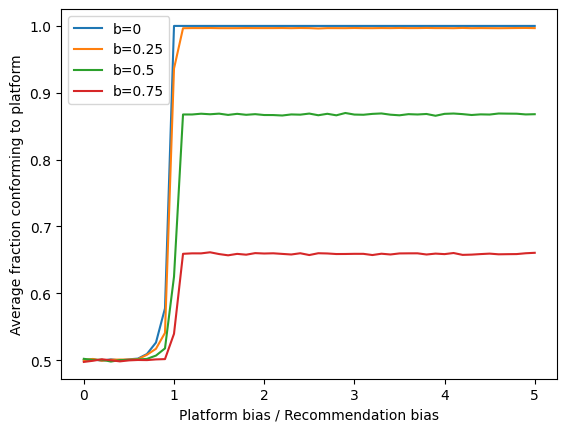

In [95]:
plot_conform(platform_data, 'Platform bias / Recommendation bias')

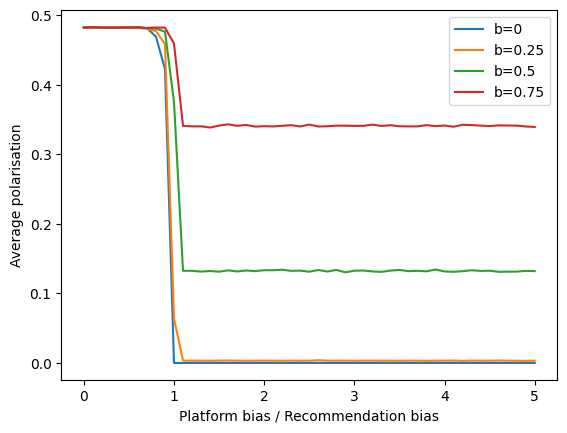

In [96]:
plot_avg2(platform_data, 'Platform bias / Recommendation bias')

Graph fraction of agents conforming to platform's opinion against level of recommendation bias

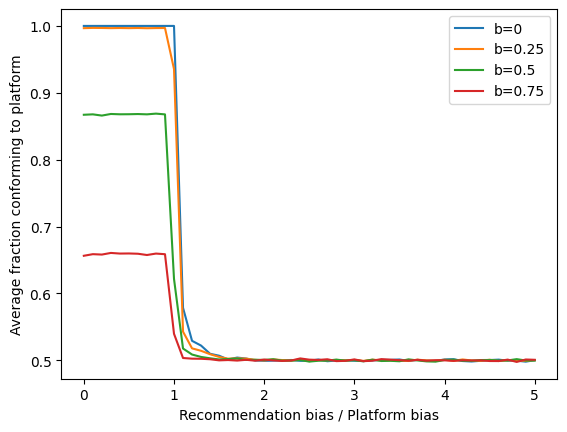

In [85]:
plot_conform(rec_data, 'Recommendation bias / Platform bias')

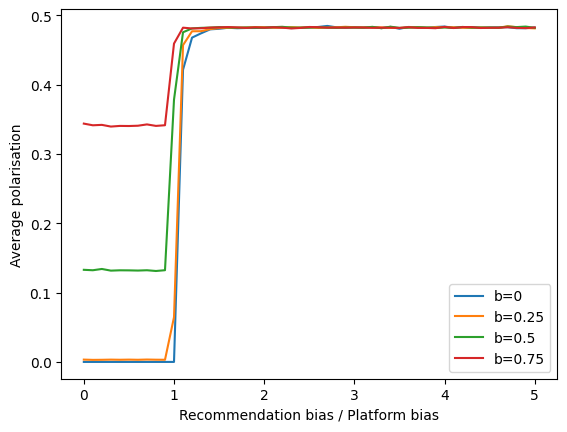

In [86]:
plot_avg2(rec_data, 'Recommendation bias / Platform bias')

Text(0.08, 0.5, 'Agent Bias, B')

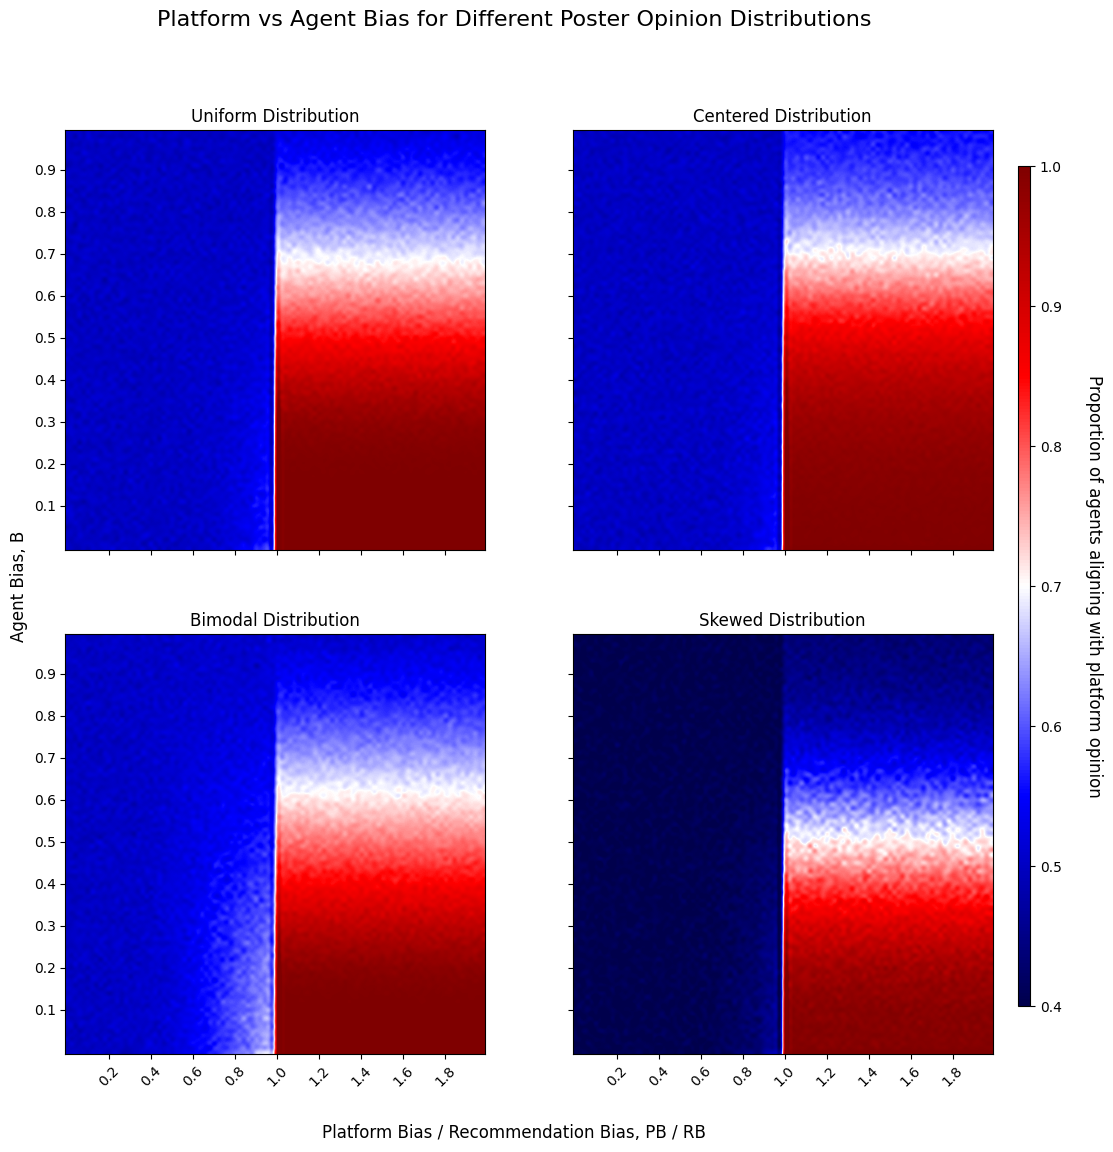

In [100]:

a1 = np.load('data/platform-vs-agent-bias/data-p0.3-c0.1-n0-uniform.npy')
a2 = np.load('data/platform-vs-agent-bias/data-p0.3-c0.1-n0-bimodal.npy')
a3 = np.load('data/platform-vs-agent-bias/data-p0.3-c0.1-n0-centered.npy')
a4 = np.load('data/platform-vs-agent-bias/data-p0.3-c0.1-n0-skewed.npy')

def plot_model(arr, ax, title):
	im = ax.imshow(arr, cmap='seismic', interpolation='spline36', origin='lower', vmin=0.4, vmax=1.0)
	ax.set_title(title, fontsize=12)
	ax.set_xticks(np.arange(10, 100, 10), np.round(np.linspace(0.2, 1.8, 9), 2), rotation=45)
	ax.set_yticks(np.arange(10, 100, 10), np.round(np.linspace(0.1, 0.9, 9), 2))
	return im

fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)

im1 = plot_model(a1, axs[0, 0], 'Uniform Distribution')
plot_model(a2, axs[1, 0], 'Bimodal Distribution')
plot_model(a3, axs[0, 1], 'Centered Distribution')
plot_model(a4, axs[1, 1], 'Skewed Distribution')

plt.suptitle('Platform vs Agent Bias for Different Poster Opinion Distributions', fontsize=16)
cbax_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = fig.colorbar(im1, cax=cbax_ax)
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel('Proportion of agents aligning with platform opinion', rotation=270, fontsize=12)
fig.text(0.5, 0.04, 'Platform Bias / Recommendation Bias, PB / RB', ha='center', fontsize=12)
fig.text(0.08, 0.5, 'Agent Bias, B', va='center', rotation='vertical', fontsize=12)

# fig.savefig(f'data/platform-vs-agent-bias/heatmap.png', dpi=600, bbox_inches='tight')

Graphs post distribution models

In [103]:
def plot_poster_distribution_model(dist):
	opinions = np.arange(-1.0, 1.0, 0.01)

	if dist == 'uniform':
		probs = np.ones_like(opinions)
	elif dist == 'bimodal':
		probs = np.cos((opinions + 1) / 2 * np.pi) ** 2
	elif dist == 'centered':
		probs = np.cos(opinions / 2 * np.pi) ** 2
	elif dist == 'skewed':
		probs = np.cos((opinions + 1) / 4 * np.pi) ** 2
	else:
		raise ValueError('Invalid poster distribution')
	
	probs /= np.sum(probs)
	fig, ax = plt.subplots(figsize=(8, 6))
	ax.plot(opinions, probs)
	ax.set_yticks([])

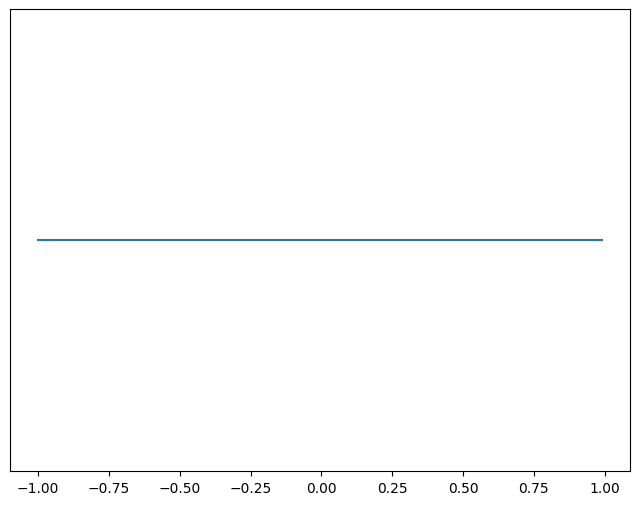

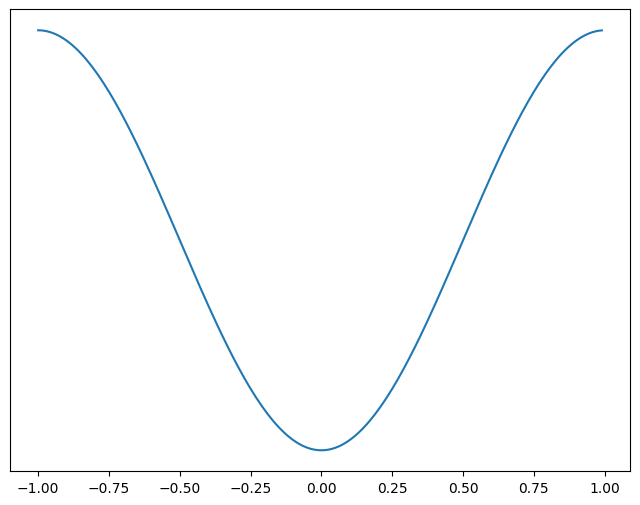

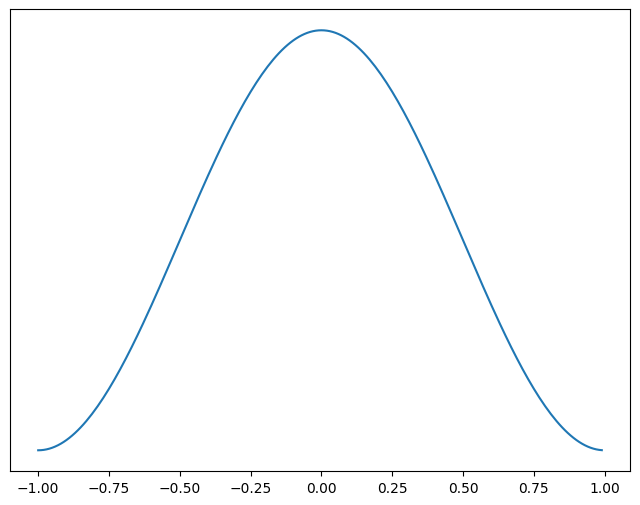

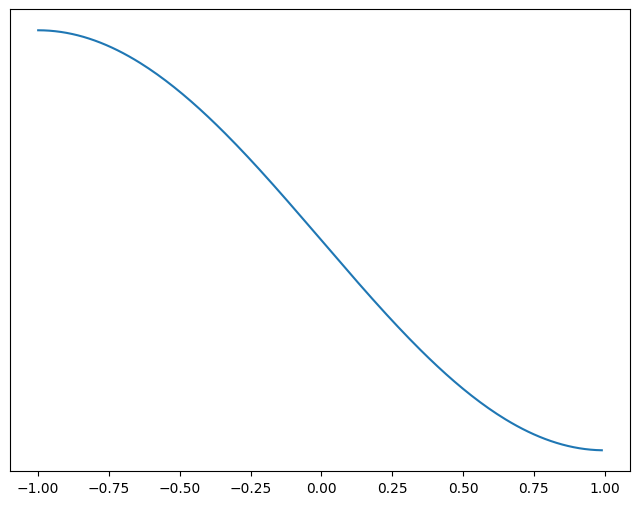

In [104]:
plot_poster_distribution_model('uniform')
plot_poster_distribution_model('bimodal')
plot_poster_distribution_model('centered')
plot_poster_distribution_model('skewed')